In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
register_matplotlib_converters()

%matplotlib inline

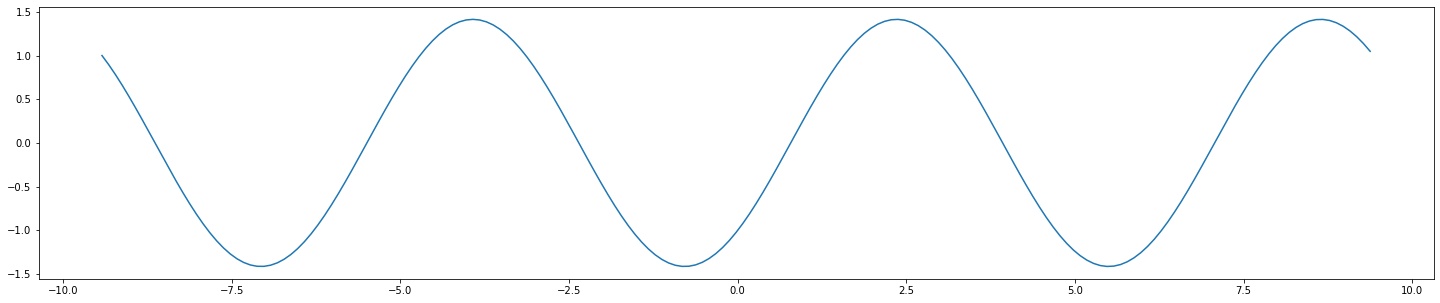

In [18]:
def train_function(x):
    return np.sin(x)-np.cos(x)
fig,ax = plt.subplots(figsize=(25,5))
xaxis = np.arange(-3*np.pi, 3*np.pi, 0.1)
train_seq = train_function(xaxis)
plt.plot(xaxis,train_seq)
plt.show()

In [21]:
# fig,ax = plt.subplots(figsize=(25,5))
# window = np.arange(200)
# convolved = np.convolve(train_seq,window)
# timesteps = np.arange(len(convolved))
# plt.plot(convolved)
# plt.show()

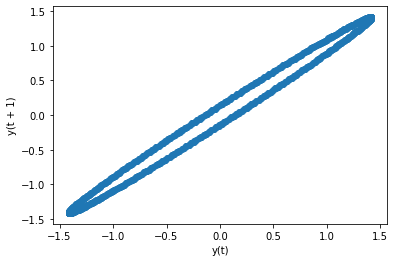

In [127]:
lag_plot(pd.Series(train_seq))

In [173]:
df = pd.DataFrame(train_seq)
df = pd.concat([df.shift(5),df],axis = 1)
df.columns = ['t','t+1']
df.corr()

,t,t+1
t,1.000000,0.877538
t+1,0.877538,1.000000


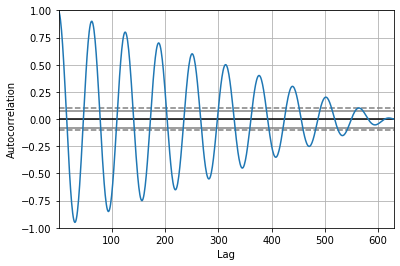

In [223]:
series = pd.DataFrame(train_seq)
pd.plotting.autocorrelation_plot(series)

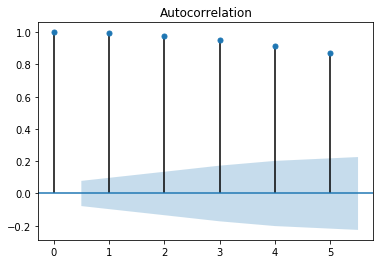

In [176]:
plot_acf(series, lags=5)
plt.show()

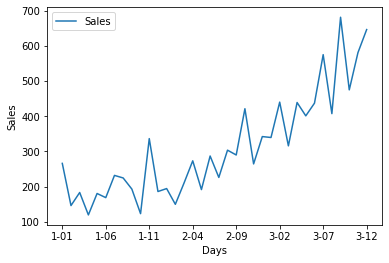

In [228]:
series = pd.read_csv('shampoo.csv', index_col=['Month'])
series.plot()
plt.xlabel('Days')
plt.ylabel('Sales')
plt.show()

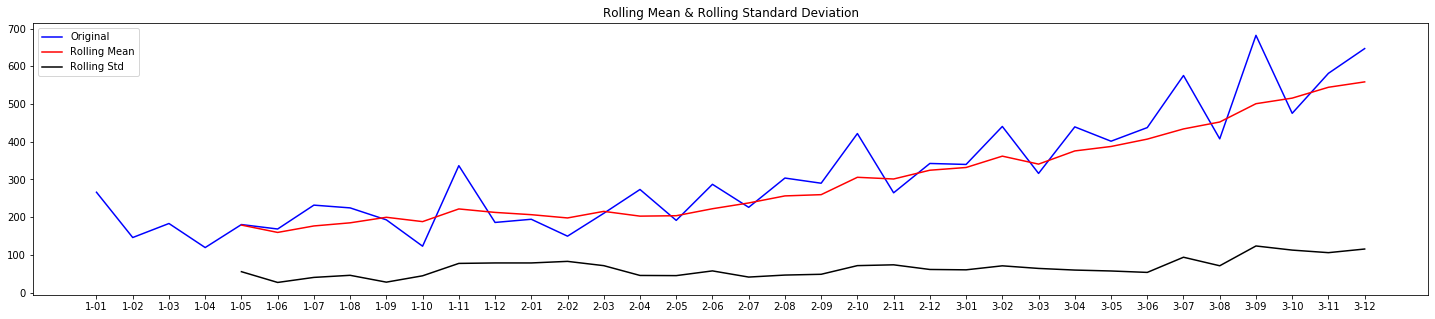

In [229]:
fig,ax = plt.subplots(figsize=(25,5))
window = 5
rolling_mean = series.rolling(window = window).mean()
rolling_std = series.rolling(window = window).std()
plt.plot(series, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

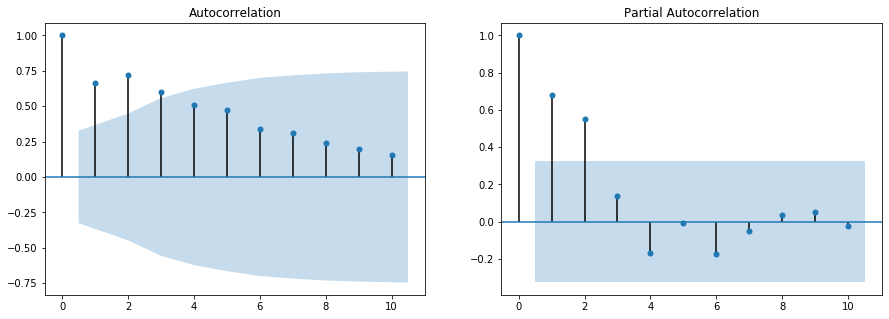

In [230]:
fig, ax = plt.subplots(1,2,figsize = (15,5))
plot_acf(series, lags=10,ax = ax[0])
plot_pacf(series, lags=10, ax = ax[1])

plt.show()

Coefficients: [ 8.75451135e+01  1.32786319e-01  5.29507877e-01 -1.53628029e-03]
predicted=345.462248, expected=342.300000
predicted=272.824911, expected=339.700000
predicted=306.291164, expected=440.400000
predicted=272.148602, expected=315.900000
predicted=285.447173, expected=439.300000
predicted=269.082872, expected=401.300000
predicted=274.004068, expected=437.400000
predicted=265.972078, expected=575.500000
predicted=267.536492, expected=407.600000
predicted=263.483663, expected=682.000000
predicted=263.786211, expected=475.300000
predicted=261.677977, expected=581.300000
predicted=261.564461, expected=646.900000
Test MSE: 52168.691


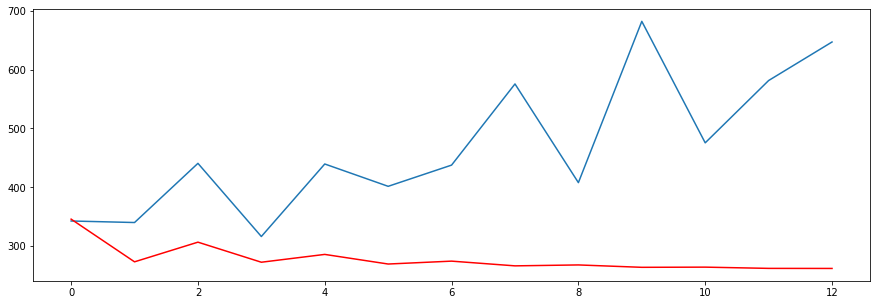

In [231]:
fig, ax = plt.subplots(figsize = (15,5))

X = series.values
size = int(len(X) * 0.66)
# print (size)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# print(history)
model = AutoReg(history,3)
model_fit = model.fit()
# print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

# for t in range(len(test)):
#     model = AutoReg(history,2)
#     model_fit = model.fit()
    
#     output = model.predict(model_fit.params)
    
#     yhat = output[-1]
#     predictions.append(yhat)
#     obs = test[t]
#     history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()